# QS World University Rankings - Data Preprocessing
Visual Analytics 2025/2026

Dariga Shokayeva (2242443) & Yelizaveta Tskkhe (2224260)

# Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Dataset from Kaggle

In [ ]:
file_path = "qs-world-rankings-2025.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "darrylljk/worlds-best-universities-qs-rankings-2025",
  file_path,
)

Using Colab cache for faster access to the 'worlds-best-universities-qs-rankings-2025' dataset.


In [ ]:
print("First 5 records:")
df.head()

First 5 records:


,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7


# Analyze and Impute Missing Values

In [ ]:
missing_count = df.isnull().sum()

total_count = df.shape[0]  # same for all columns

missing_pct = (missing_count / total_count) * 100

missing_summary = pd.DataFrame({
    "Count of missing values": missing_count,
    "Total count of values": total_count,
    "Missing/total (%)": missing_pct.round(2)
})

missing_summary


,Count of missing values,Total count of values,Missing/total (%)
2025 Rank,0,1503,0.00
2024 Rank,21,1503,1.40
Institution Name,0,1503,0.00
Location,0,1503,0.00
Location Full,0,1503,0.00
Size,0,1503,0.00
Academic Reputation,0,1503,0.00
Employer Reputation,0,1503,0.00
Faculty Student,0,1503,0.00
Citations per Faculty,0,1503,0.00


In [ ]:
total_missing = df.isnull().sum().sum()
print("Total missing values:", int(total_missing))

Total missing values: 199


In [ ]:
features_pca = [
    'Academic Reputation',
    'Employer Reputation',
    'Faculty Student',
    'Citations per Faculty',
    'International Faculty',
    'International Students',
    'International Research Network',
    'Employment Outcomes',
    'Sustainability'
]

In [ ]:
X = df[features_pca].apply(pd.to_numeric, errors="coerce")

imputer = KNNImputer(n_neighbors=5, weights="distance")  # tweak k
X_knn = imputer.fit_transform(X)

X_imputed = pd.DataFrame(X_knn, columns=features_pca, index=df.index)

In [ ]:
X_imputed

,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability
0,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0
1,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7
2,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0
3,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4
4,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8
...,...,...,...,...,...,...,...,...,...
1498,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0
1499,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3
1500,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0
1501,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1


# Perform PCA on selected Features

In [ ]:
def run_pca(df, feature_cols, n_components=2, prefix="pca_", random_state=42):
    """
    df: original DataFrame
    feature_cols: list of numeric columns to use for PCA
    n_components: number of principal components
    prefix: prefix for new PCA columns in df
    """
    # 1. Extract matrix
    X = df[feature_cols].copy()

    # 2. Scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. PCA
    pca = PCA(n_components=n_components, random_state=random_state)
    X_pca = pca.fit_transform(X_scaled)
    df_pca = df.copy()
    for i in range(n_components):
        df_pca[f"{prefix}{i+1}"] = X_pca[:, i]
    print("Explained variance ratio:", pca.explained_variance_ratio_)
    print("Total explained variance (2D):", pca.explained_variance_ratio_.sum())
    return df_pca, scaler, pca

In [ ]:
df_pca, scaler, pca = run_pca(X_imputed, features_pca, n_components=2)

Explained variance ratio: [0.50549784 0.12995519]
Total explained variance (2D): 0.6354530288507045


In [ ]:
components = pca.components_

loadings = pd.DataFrame(
    components.T,
    columns=[f"PC{i+1}" for i in range(components.shape[0])],
    index=features_pca,
)

print(loadings)

                                     PC1       PC2
Academic Reputation             0.416632 -0.283898
Employer Reputation             0.376482 -0.348104
Faculty Student                 0.175298 -0.199268
Citations per Faculty           0.298461  0.158397
International Faculty           0.305055  0.558471
International Students          0.292833  0.541199
International Research Network  0.343817  0.053541
Employment Outcomes             0.334350 -0.354053
Sustainability                  0.395046  0.020544


In [ ]:
for pc in loadings.columns:
    print(f"\nTop features for {pc}:")
    print(loadings[pc].abs().sort_values(ascending=False).head(5))



Top features for PC1:
Academic Reputation               0.416632
Sustainability                    0.395046
Employer Reputation               0.376482
International Research Network    0.343817
Employment Outcomes               0.334350
Name: PC1, dtype: float64

Top features for PC2:
International Faculty     0.558471
International Students    0.541199
Employment Outcomes       0.354053
Employer Reputation       0.348104
Academic Reputation       0.283898
Name: PC2, dtype: float64


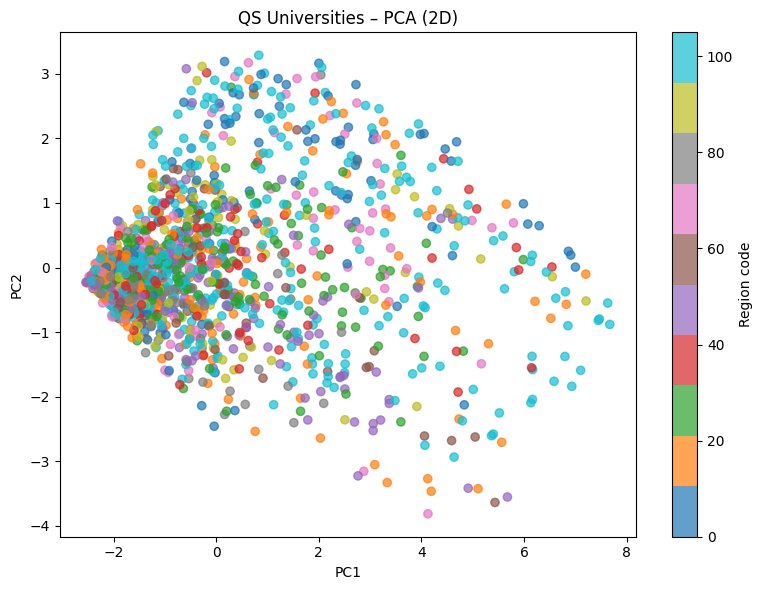

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_pca["pca_1"],
    df_pca["pca_2"],
    c=df["Location"].astype("category").cat.codes,  # or cluster later
    cmap="tab10",
    alpha=0.7,
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("QS Universities – PCA (2D)")
plt.colorbar(scatter, label="Region code")
plt.tight_layout()
plt.show()

In [ ]:
metadata_cols = ['Institution Name', 'Location', '2025 Rank', '2024 Rank', 'QS Overall Score'] # dont need these columns for PCA but need in the final clean dataset

for col in metadata_cols:
    if col not in df.columns:
        print(f"missing: {col}")

df_pca[metadata_cols] = df[metadata_cols].copy()


In [ ]:
cols_to_keep = metadata_cols + features_pca + ['pca_1', 'pca_2']
df_pca = df_pca[cols_to_keep]

df_pca.to_csv("qs_2025_pca.csv", index=False)


# Interactive graphs

In [ ]:
fig = px.scatter(
    df_pca,
    x="pca_1",
    y="pca_2",
    color="Location",
    hover_data=["Institution Name", "Location", "2025 Rank", "QS Overall Score"]
)

fig.show()

In [ ]:
df = pd.read_csv("/content/qs_2025_pca.csv")

row = df.iloc[0]   # tetsing

values = [row[f] for f in features_pca]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=values,
    theta=features_pca,
    fill='toself',
    name=row["Institution Name"]
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 100])
    ),
    showlegend=True,
    title=f"University Profile: {row['Institution Name']}"
)

fig.show()


In [ ]:
selection = df.sample(10)   # testing - mean

mean_profile = selection[features_pca].mean()

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r=[mean_profile[f] for f in features_pca],
    theta=features_pca,
    fill="toself"))
fig.update_layout(polar=dict(radialaxis=dict(visible=True)))
fig.show()


In [ ]:
df = pd.read_csv("qs_2025_pca.csv")

selection = df.sample(10, random_state=42)

fig = go.Figure()

for _, row in selection.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[row[f] for f in features_pca],
        theta=features_pca,
        fill='toself',
        name=row["Institution Name"],   # legend
        opacity=0.4
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 100])
    ),
    showlegend=True,
    legend=dict(
        orientation="v",
        x=1.1,
        y=1.0
    ))

fig.show()
